In [1]:
# LOAD THE IMAGE.ZIP AND UTILS.PY BEFORE RUNNING THIS CODE
import numpy as np

import matplotlib.pyplot as plt
import cv2  
import sys

from PIL import Image, ImageOps
from utils import plot_filtered_image, plot_multiple_rows

In [ ]:
!unzip /content/images.zip

## 0. Basic Image processing

### Read in and display the image

In [2]:
# Read in the image
image = Image.open('images/ben.png')

# Print out the image dimensions
print('Image dimensions:', image.size)
print('Type:', type(image))

Image dimensions: (768, 1024)
Type: <class 'PIL.PngImagePlugin.PngImageFile'>


In [3]:
# This will open an image in a separate window
image.show()

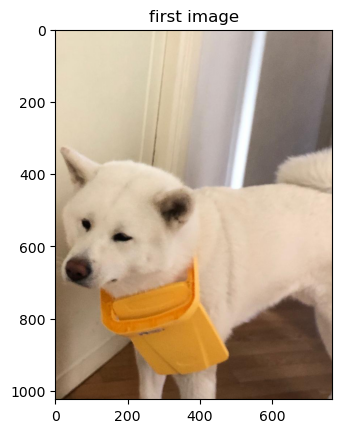

In [4]:
#We create our empty box
plt.figure()
#We can add a title
plt.title('first image')
#we can add to the empty box an image
plt.imshow(image)

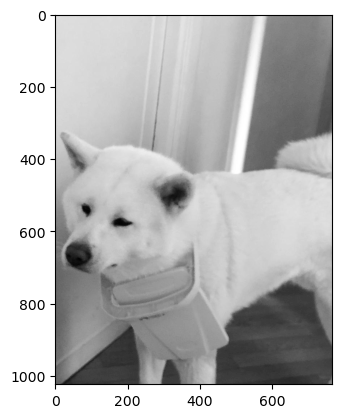

In [5]:
#Grayscale transformation
gray_image = image.convert('L')
plt.imshow(gray_image, cmap="gray")

### Vector representation

In [6]:
# We can convert the image to a numpy array
im_vect = np.array(image)
im_vect

array([[[235, 221, 195],
        [235, 221, 195],
        [235, 221, 195],
        ...,
        [167, 150, 143],
        [166, 149, 142],
        [165, 148, 141]],

       [[235, 221, 195],
        [235, 221, 195],
        [235, 221, 195],
        ...,
        [167, 150, 143],
        [166, 149, 142],
        [165, 148, 141]],

       [[235, 221, 195],
        [235, 221, 195],
        [235, 221, 195],
        ...,
        [166, 149, 142],
        [165, 148, 141],
        [165, 148, 141]],

       ...,

       [[117,  93,  67],
        [118,  94,  68],
        [117,  96,  69],
        ...,
        [148, 129, 114],
        [151, 132, 117],
        [154, 135, 118]],

       [[116,  92,  66],
        [114,  93,  66],
        [115,  94,  67],
        ...,
        [148, 129, 114],
        [151, 132, 117],
        [153, 134, 117]],

       [[117,  96,  69],
        [116,  95,  68],
        [115,  94,  67],
        ...,
        [145, 126, 111],
        [147, 128, 113],
        [149, 130, 113]]

In [7]:
im_vect.shape

(1024, 768, 3)

In [8]:
#Find the maximum and minimum grayscale values in this image

max_val = np.amax(im_vect)
min_val = np.amin(im_vect)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  0


(array([1.4000e+01, 7.6000e+01, 1.4200e+02, 1.6800e+02, 1.5500e+02,
        1.9000e+02, 2.0600e+02, 1.9800e+02, 2.2700e+02, 2.2300e+02,
        2.5800e+02, 2.6900e+02, 2.5100e+02, 2.4800e+02, 2.3000e+02,
        2.1300e+02, 2.6500e+02, 3.2300e+02, 3.0700e+02, 3.8800e+02,
        4.1100e+02, 8.5500e+02, 1.1350e+03, 1.3630e+03, 2.2080e+03,
        3.4990e+03, 5.0650e+03, 6.6330e+03, 7.0780e+03, 7.7310e+03,
        8.9110e+03, 7.5880e+03, 5.9590e+03, 6.0050e+03, 6.3980e+03,
        5.5810e+03, 4.1140e+03, 3.6580e+03, 3.4990e+03, 3.0130e+03,
        2.3550e+03, 1.8650e+03, 9.3600e+02, 1.5630e+03, 1.2170e+03,
        1.1640e+03, 1.1620e+03, 1.5890e+03, 2.6110e+03, 4.5440e+03,
        5.8110e+03, 5.8680e+03, 5.4680e+03, 5.4470e+03, 6.2240e+03,
        6.5730e+03, 7.0250e+03, 7.1470e+03, 7.2650e+03, 6.3800e+03,
        6.4270e+03, 6.7190e+03, 7.5240e+03, 7.9280e+03, 8.1550e+03,
        8.3200e+03, 7.7350e+03, 7.7220e+03, 7.1590e+03, 6.9520e+03,
        7.2180e+03, 7.2570e+03, 7.0410e+03, 7.27

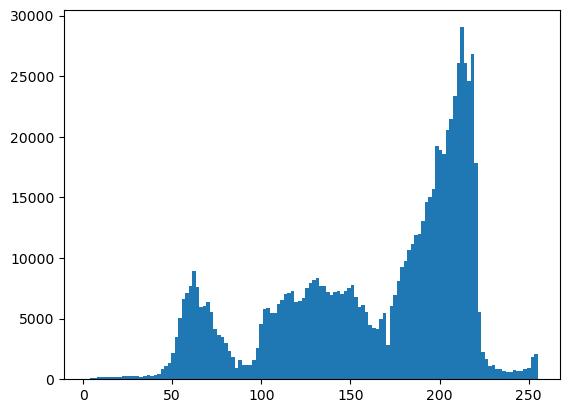

In [12]:
# Create an histogram (takes input a numpy object and prints the values of all the pixels as an histogram)
flat = np.array(gray_image).flatten()
plt.hist(flat,128)

In [13]:
flat.shape

(786432,)

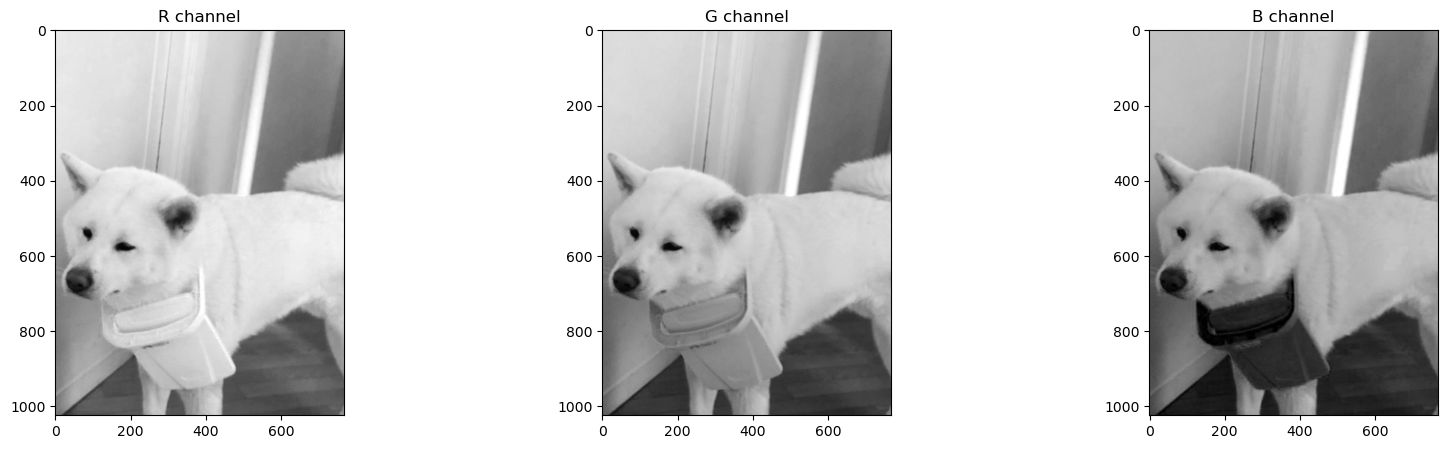

In [10]:
# Isolate RGB channels
r = im_vect[:,:,0]
g = im_vect[:,:,1]
b = im_vect[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

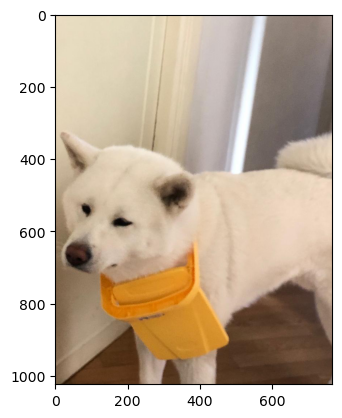

In [11]:
# Go back to the image representation
np2img = Image.fromarray(im_vect)
plt.imshow(np2img)

### Resizing, cropping and rotating

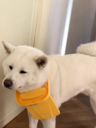

In [17]:
# Set rows and columns
# lets downsize the image using new width and height (maintaining ratio)
MAX_SIZE = 128
resized_img = image.copy()
resized_img.thumbnail((MAX_SIZE, MAX_SIZE))
resized_img

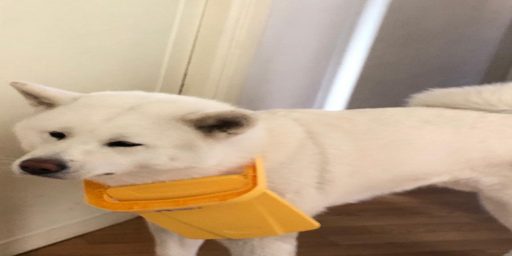

In [22]:
# Alternative (no aspect ratio)
height, width = (256, 512)
resized_img2 = image.copy()
resized_img2.resize([width,height])

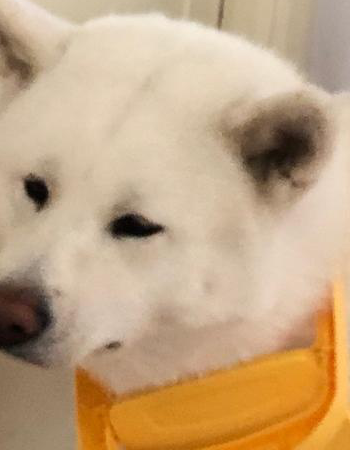

In [36]:
# Cropping an image
# Coordinated are: left, up, right, down
crop_dim = (50, 350, 400, 800)
# Cut a part of the image
img_cropped = image.crop(crop_dim)
img_cropped

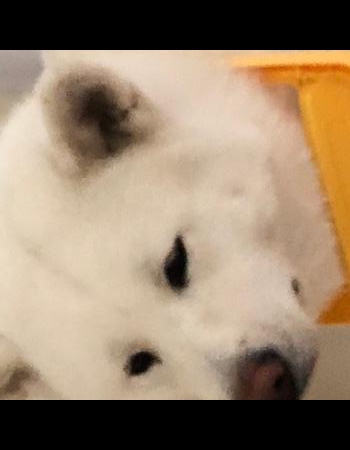

In [28]:
#Rotate an image command
r90 = img_cropped.rotate(90)
r90

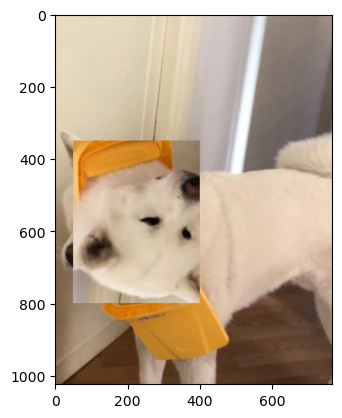

In [42]:
# Mind the black border
r45 = img_cropped.rotate(180)
r45

# You can paste the cropped and rotated image over the original image
new_img = image.copy()
new_img.paste(r45, crop_dim)
plt.imshow(new_img)

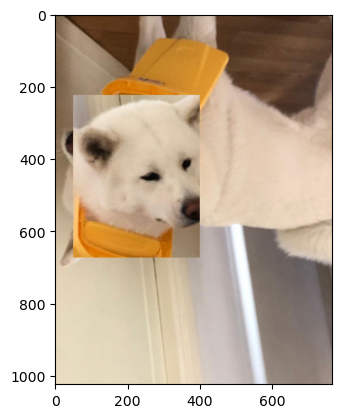

In [43]:
# Flip the image
flipped_img = ImageOps.flip(new_img)
plt.imshow(flipped_img)

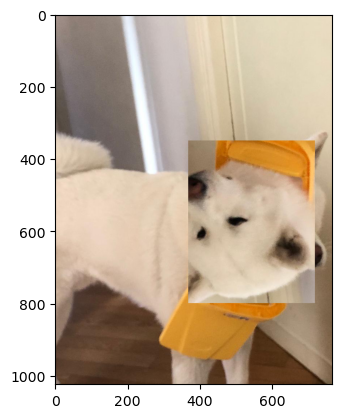

In [44]:
# Mirror the image
mirrored_img = ImageOps.mirror(new_img)
plt.imshow(mirrored_img)

### OpenCV

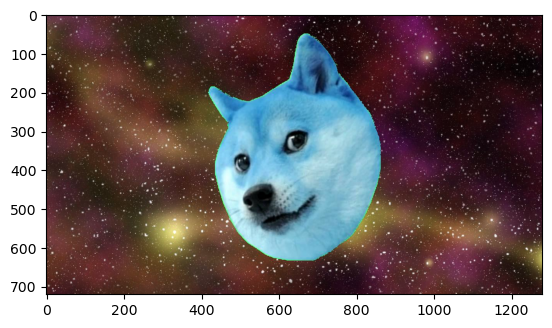

In [2]:
# OpenCV is an advanced alternative library that allows us to do more complex operations
# The same basic operations that we've seen so far can be performed with OpenCV as well
# Fill free to choose your favourite CV library
cv2_img = cv2.imread("images/space_shiba.jpg")
plt.imshow(cv2_img)

In [3]:
# By default, OpenCV read the images as BGR images
# We can easily convert the image to other color spaces
rgb_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
rgb_img

array([[[ 81,  70, 100],
        [ 65,  54,  84],
        [ 60,  46,  79],
        ...,
        [ 32,  24,  63],
        [ 52,  44,  83],
        [ 84,  76, 115]],

       [[ 88,  77, 107],
        [ 73,  62,  92],
        [ 62,  48,  81],
        ...,
        [ 18,  10,  49],
        [ 16,   8,  47],
        [ 31,  23,  62]],

       [[ 73,  62,  94],
        [ 69,  58,  90],
        [ 66,  55,  89],
        ...,
        [ 32,  24,  63],
        [ 19,  11,  50],
        [ 23,  15,  54]],

       ...,

       [[ 22,  25,  56],
        [ 25,  28,  59],
        [ 33,  36,  69],
        ...,
        [ 22,  25,  44],
        [ 14,  17,  34],
        [ 11,  14,  31]],

       [[ 50,  54,  83],
        [ 32,  35,  66],
        [ 28,  31,  64],
        ...,
        [ 19,  22,  41],
        [ 22,  25,  42],
        [ 30,  33,  48]],

       [[ 84,  88, 117],
        [ 36,  40,  69],
        [ 13,  16,  49],
        ...,
        [ 13,  16,  33],
        [ 41,  44,  61],
        [ 74,  77,  92]]

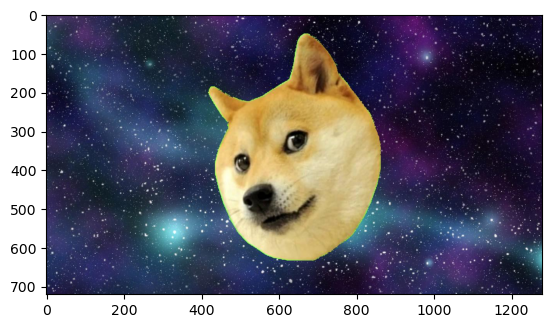

In [4]:
# cv2 returns a np.ndarray
# let's visualize the image
plt.imshow(rgb_img)

In [5]:
# You can of course convert the cv2 image to PIL and viceversa
cv2_to_pil = Image.fromarray(rgb_img)
type(cv2_to_pil)

PIL.Image.Image

In [6]:
# You can of course convert the cv2 image to PIL and viceversa
pil_to_cv2 = cv2.cvtColor(np.array(cv2_to_pil), cv2.COLOR_RGB2BGR)
type(pil_to_cv2)

numpy.ndarray

## 1. Image Filtering

### 2D Convolution (Image Filtering)

Whether we are aware of it or not, computer vision is everywhere in our daily life. We see filtered photos in our social media feeds, news articles, magazines, books, basically everywhere! Filters can be used to form a new, preferably enhanced image from a combination of the original image's pixel values.

In this first part of the lab, we will implement some basic image filters using OpenCV. To complete the lab, you are asked to read this notebook and complete the missing parts highlighted as `# TODO`.

In [26]:
gray = Image.open('images/aula.jpg')
gray = np.array(gray.convert("RGB"))
gray.dtype

dtype('uint8')

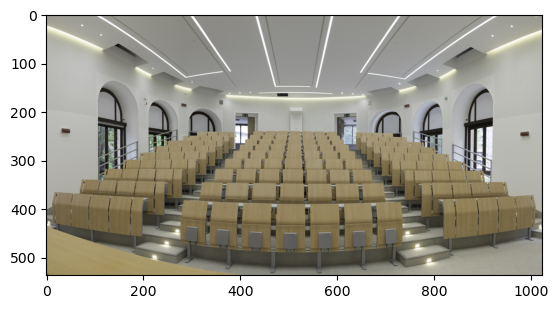

In [27]:
plt.imshow(gray)

OpenCV provides the `cv2.filter2D()` (check the [documentation](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)) function to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A **$5\times5$ identity filter** kernel will look like the below:

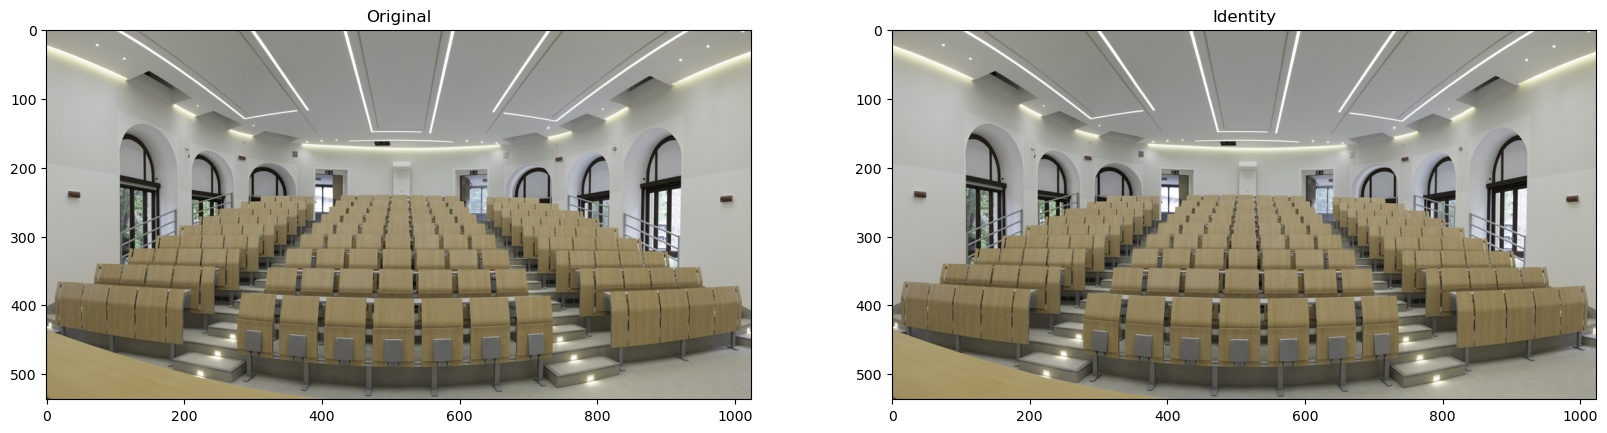

In [28]:
# Define a custom 3x3 identity kernel
identity_kernel = np.array([[0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0]], dtype=np.float32)

identity = cv2.filter2D(src=gray, ddepth=-1, kernel=cv2.flip(identity_kernel,-1))
plot_filtered_image(gray, identity, "Identity")


Note that by default, the `cv2.filter2D()` function does actually compute correlation, not the convolution: if you need a real convolution, flip the kernel using `cv2.flip()` ([more details here](https://stackoverflow.com/questions/58477255/how-to-do-convolution-in-opencv)).

Image blurring is a common operation obtained by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). The simplest filter is called the **average filter**, which is applied by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. A $5\times5$ normalized box filter would look like the below (we use 25 since we have 25 elements in the matrix):

$$
K = \frac{1}{25} 
\begin{bmatrix}
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

Lets implement this filter average filter. Define a $5\times5$ average kernel. Remember that the filter must be normalized with respect to the number of elements!


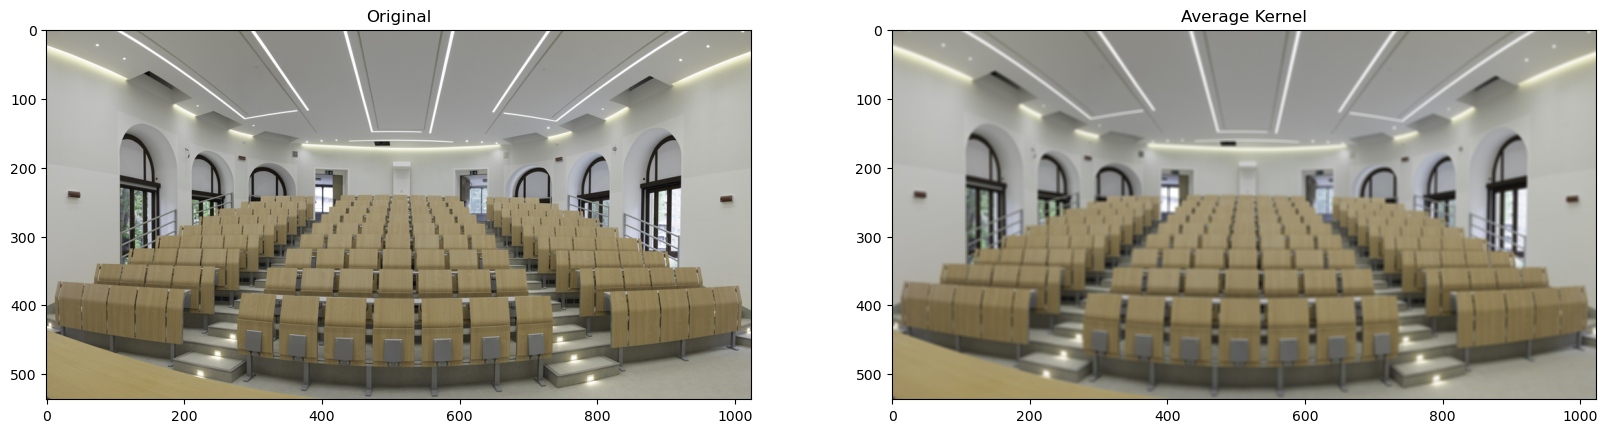

In [29]:
dim = 5
avg_kernel = np.ones((dim,dim), dtype=np.float32) 
avg_kernel = avg_kernel * 1 / (avg_kernel.shape[0] * avg_kernel.shape[1])
avg = cv2.filter2D(src=gray, ddepth=-1, kernel=cv2.flip(avg_kernel,-1))

plot_filtered_image(gray, avg, "Average Kernel")

**Warining**: Notice that by default, since the pixel values can only vary within the range $[0, 255]$, the convertion from PIL to numpy arrays produces an array of `uint8` numbers, that is only 8 bits are used to represent the pixel values. Therefore, if some pixel values goes outside this range you will have a *numerical underflow or overflow*. Here's an example:

In [78]:
np.array([np.uint8(0), np.uint8(255), np.uint8(256), np.uint8(-1), np.uint8(-128), np.uint8(500)])

C:\Users\gianm\AppData\Local\Temp\ipykernel_14500\1252423057.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  np.array([np.uint8(0), np.uint8(255), np.uint8(256), np.uint8(-1), np.uint8(-128), np.uint8(500)])
C:\Users\gianm\AppData\Local\Temp\ipykernel_14500\1252423057.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  np.array([np.uint8(0), np.uint8(255), np.uint8(256), np.uint8(-1), np.uint8(-128), np.uint8(500)])
C:\Users\gianm\AppData\Local\Temp\ipykernel_14500\1252423057.py:1: DeprecationWarning: NumPy will stop 

array([  0, 255,   0, 255, 128, 244], dtype=uint8)

Why bother with this? It is a problem to take into account when we do operations between images such as subtracting one image from the other or adding two images.

Sometimes it is useful to do operations between an image and a filtered version of it. In these cases, it is necessary to take into account the above problem! The solutions, in this case, can be two: (i) convert the image to another larger numeric representation and then reconvert by clipping the values between 0 and 255, or (ii) perform operations between kernels, then apply the new filter to the image. Here's an example of the first approach:

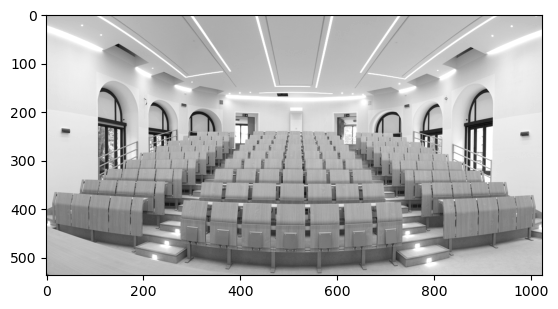

In [123]:
new_img = gray.astype('float32')

# Shift pixel intensity by a constant
intensity_shift = 50
new_img += intensity_shift

# another option is to use a factor value > 1:
# new_img *= factor_intensity

# clip pixel intensity to be in range [0, 255]
new_img = np.clip(new_img, 0, 255)

# change type back to 'uint8'
new_img = new_img.astype('uint8')
plt.imshow(new_img, cmap='gray')


Now, as we've seen in class, we can subtract the smoothed image from the original one to observe the details that have been removed. Pay attention to what we have just said! To do this you can follow one of the two approaches just shown.

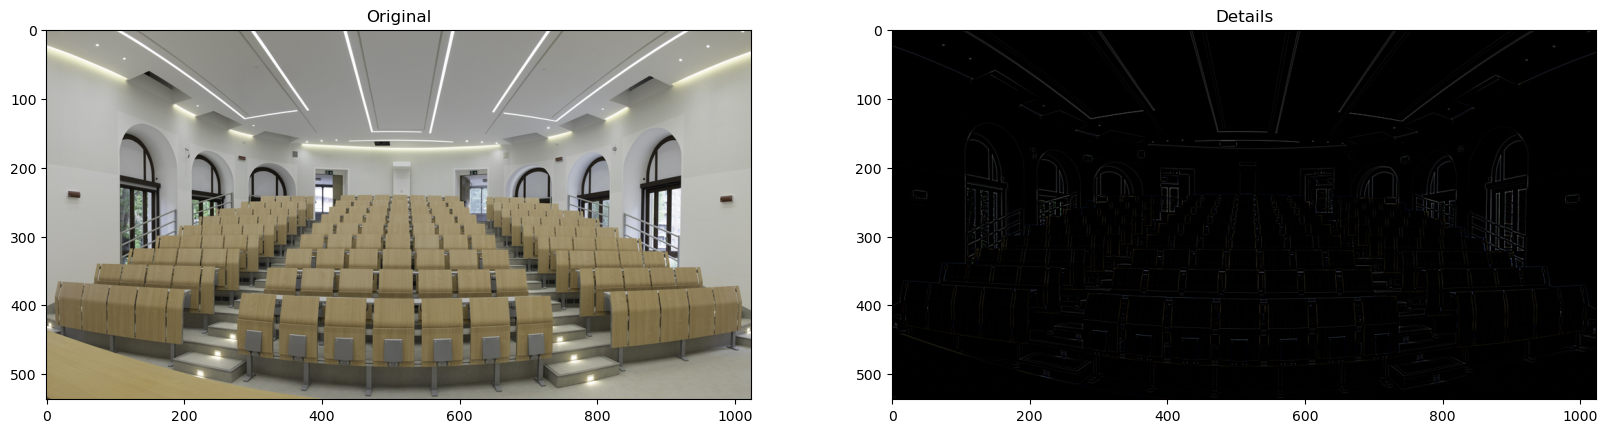

In [42]:
# Compute the difference between the identity and averaged images
detail_kernel = np.subtract(identity_kernel, avg_kernel)
detail = cv2.filter2D(src=gray, ddepth=-1, kernel=cv2.flip(detail_kernel,-1))

plot_filtered_image(gray, detail, "Details")

Now we can add the details to the original image to obtain a sharpened image.

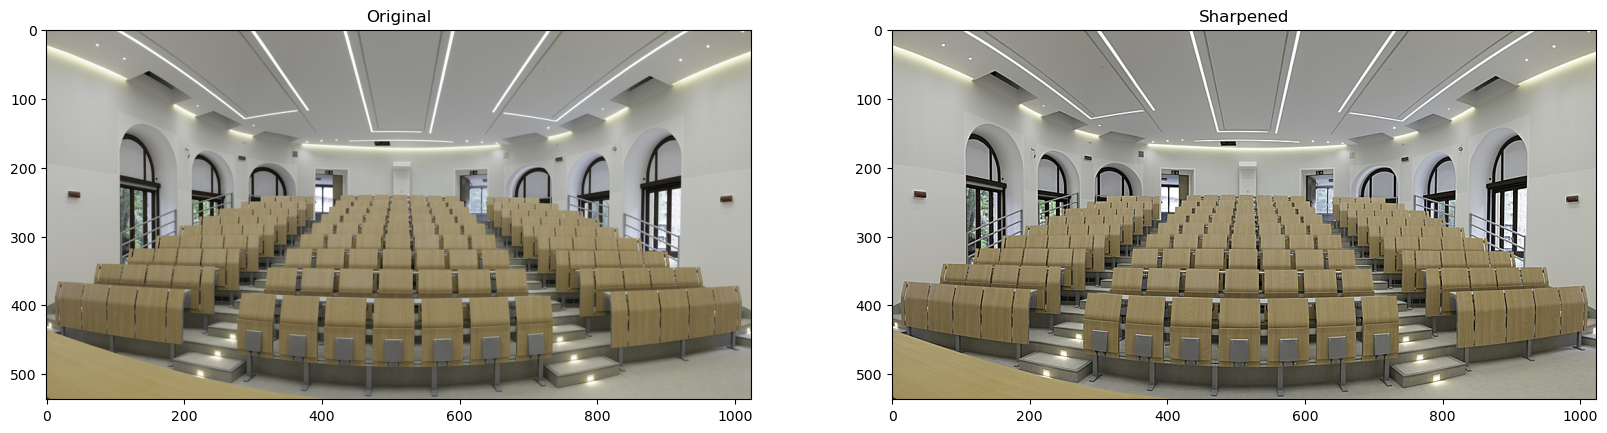

In [43]:
# Sum the details to the identity image to obtain a sharpened image
sharpened_kernel = identity_kernel + detail_kernel
sharpened = cv2.filter2D(src=gray, ddepth=-1, kernel=cv2.flip(sharpened_kernel,-1))

plot_filtered_image(gray, sharpened, "Sharpened")

Do you see any difference? The sharpened image should have stronger details with respect to the original one.

### Image Smoothing (Blurring) with OpenCV 

In [6]:
# Open this image: 'images/einstein.jpg' and convert it to a numpy array
img = cv2.imread("images/einstein.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img

array([[[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [71, 71, 71]],

       [[59, 59, 59],
        [63, 63, 63],
        [66, 66, 66],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [70, 70, 70]],

       [[54, 54, 54],
        [60, 60, 60],
        [66, 66, 66],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [71, 71, 71]],

       ...,

       [[36, 36, 36],
        [35, 35, 35],
        [34, 34, 34],
        ...,
        [47, 46, 51],
        [36, 35, 40],
        [35, 34, 39]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 33, 38],
        [21, 20, 25],
        [14, 13, 18]],

       [[32, 32, 32],
        [33, 33, 33],
        [34, 34, 34],
        ...,
        [29, 28, 33],
        [23, 22, 27],
        [19, 18, 23]]], dtype=uint8)

Image smoothing is already implemented in OpenCV and can be applied by the function `cv2.blur()` or `cv2.boxFilter()`. Check the [docs](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) for more details about the kernel. We should specify the width and height of the kernel. 

Let's define again a $3\times3$ normalized blur filter:

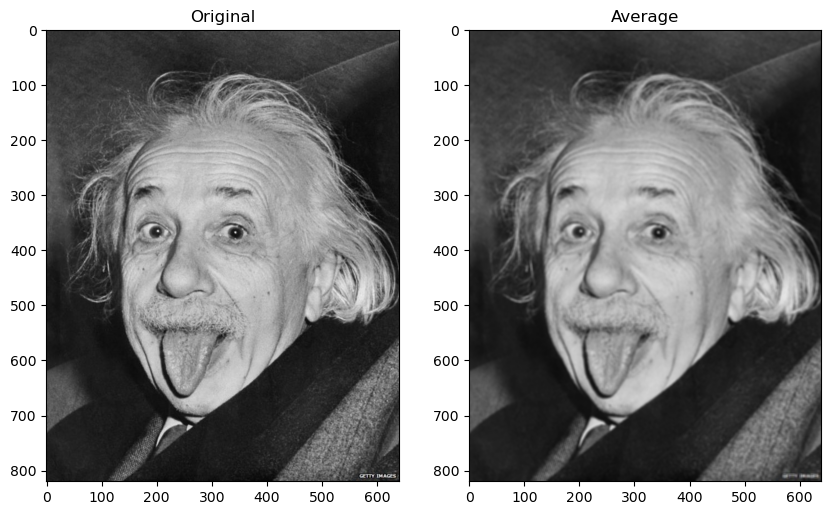

In [10]:
# Use the cv2 blur function with a 5x5 kernel
blur = cv2.blur(src=img, ksize=(5,5))

plot_filtered_image(img, blur, "Average", grayscale=False, figsize=(10,10))

Below, instead of a blur filter, we'll use a **Gaussian kernel**. It is done with the function, `cv2.GaussianBlur()`. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the *X* and *Y* directions, *sigmaX* and *sigmaY* respectively. If only *sigmaX* is specified, sigmaY is taken as the same as *sigmaX*. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

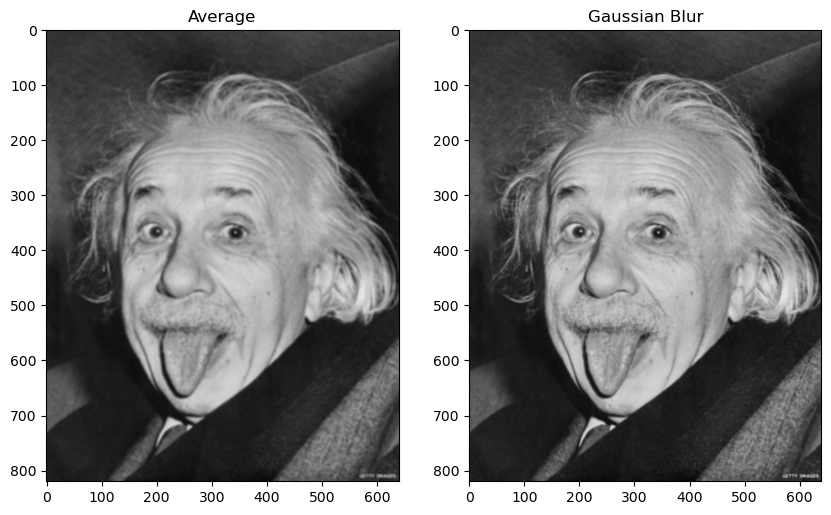

In [23]:
# Use the GaussianBlur with a 5x5 kernel
gaussian = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0, sigmaY=0)

plot_filtered_image(blur, gaussian, "Gaussian Blur", "Average", grayscale=False, figsize=(10,10))

The Gaussian blurred image should look better than the averaged one. Can you tell why?

### Non-linear filters

The filters we have looked at so far have all been *linear*, i.e., their response to a sum of two signals is the same as the sum of the individual responses. This is equivalent to saying that each output pixel is a weighted summation of some number of input pixels. Linear filters are easier to compose and are amenable to frequency response analysis.

In many cases, however, better performance can be obtained by using a *non-linear* combination of neighboring pixels. Consider for example the image below, where we applied random noise that occasionally has very large values. In this case, regular blurring with a Gaussian filter fails to remove the noisy pixels and instead turns them into softer (but still visible) spots.

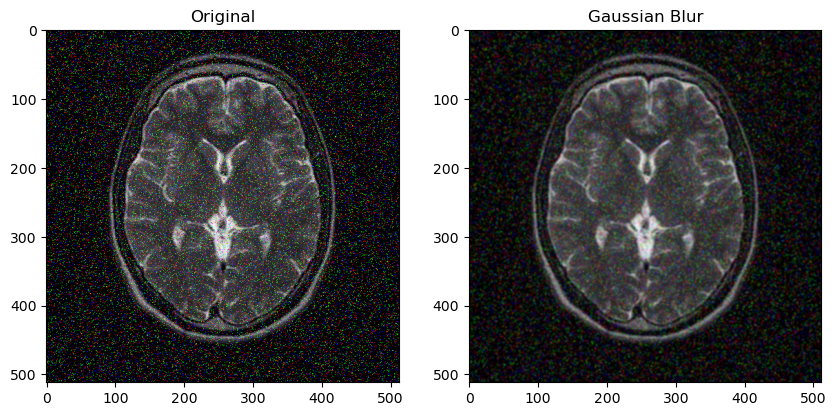

In [24]:
from skimage.util import random_noise

img = np.array(Image.open("images/brain_MR.jpg"))

noise_img = random_noise(img, mode='s&p',amount=0.1)
noise_img = np.array(255*noise_img, dtype = 'uint8')

gaussian = cv2.GaussianBlur(noise_img, (5,5), 0)
plot_filtered_image(noise_img, gaussian, "Gaussian Blur", grayscale=False, figsize=(10,10))

The function `cv2.medianBlur()` ([docs](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)) takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

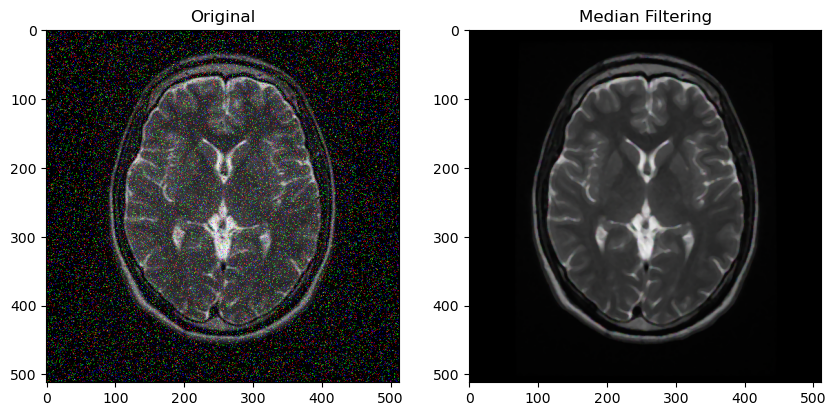

In [34]:
# Use the median blur function with kernel size = 5
median = cv2.medianBlur(src=noise_img, ksize=5)

plot_filtered_image(noise_img, median, "Median Filtering", figsize=(10,10))

`cv2.bilateralFilter()` ([docs](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)) is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

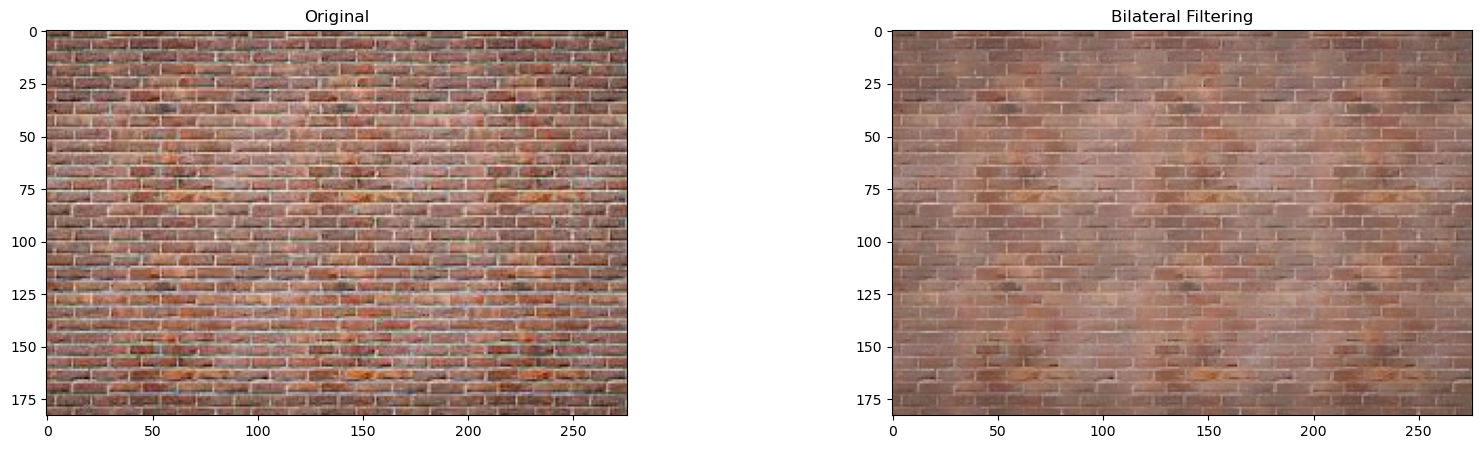

In [42]:
img = np.array(Image.open("images/wall.jpg"))

# Use the bilateral filter function. The function takes three parameters d, sigmaColor, and sigmaSpace
# play with this parameters to see how the results change
bilateral = cv2.bilateralFilter(src=img, d=10, sigmaColor=100, sigmaSpace=100)

plot_filtered_image(img, bilateral, "Bilateral Filtering")

## 2. Image frequency

We can easily think about audio signals as sound waves varying at certain frequencies. High-frequency is a high pitched noise, like a bird chirp or guitar, while low frequency sounds are low pitch, like a deep voice or a bass drum. For sound, frequency actually refers to how fast a sound wave is oscillating.

What about images? Well, as for sound, frequency in images is a **rate of change**. So, what does it means for an image to change? Differently from sound, which varies across time, **images change in space**, and a *high frequency* image is one where the intensity of pixels changes a lot. A *low frequency* image may be one that is relatively uniform in brightness or changes very slowly. This is easiest to see in an example.

In [ ]:
img = Image.open('images/colosseum.jpg')
low_frequency = img.crop((0,0,50,50))
high_frequency = img.crop((1600,1500,2000,1900))

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(img)
ax1.set_title("Colosseum")
ax2.imshow(low_frequency)
ax2.set_title("Low frequency")
ax3.imshow(high_frequency)
ax3.set_title("High frequency")

The sky in the image is mostly flat part of the image. Instead, the second patch contains a lot more information and pixels vary at very high frequency.

The Fourier Transform (FT) is an important image processing tool which is used to decompose an image into its frequency components. The output of an FT represents the image in the frequency domain, while the input image is the spatial domain (x, y) equivalent. In the frequency domain image, each point represents a particular frequency contained in the spatial domain image. So, for images with a lot of high-frequency components (edges, corners, and stripes), there will be a number of points in the frequency domain at high frequency values.

Les's visualize an intuitive example!

In [ ]:
img_stripes = Image.open('images/stripes.jpg')

# Create a low frequency image
img_shape = np.array(img_stripes).shape
flat = np.ones(img_shape, dtype=np.uint8)*(252, 169, 211)
img_solid = Image.fromarray(flat.astype(np.uint8))

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(img_stripes)
ax2.imshow(img_solid)

Now we will write a function to calculate the frequency spectrum of these images. First we will see how to find Fourier Transform using Numpy. Numpy has an FFT package to do this. `np.fft.fft2()` provides us the frequency transform which will be a complex array. Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, the output array size will be same as input.

Once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by $\frac{N}{2}$ in both the directions. This is simply done by the function, `np.fft.fftshift()`. (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

In [ ]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = np.array(img_stripes.convert("L"))
gray_solid = np.array(img_solid.convert("L"))

# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
   '''This function takes in a normalized, grayscale image
      and returns a frequency spectrum transform of that image. '''
   
   # Zero frequency component (DC component) will be at top left corner
   f = np.fft.fft2(norm_image)
   # Bring it to center, you need to shift the result by N/2 in both the directions
   fshift = np.fft.fftshift(f)
   # Once you found the frequency transform, you can find the magnitude spectrum
   # look at this page for further explanation https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
   c = 255/np.log(1+np.abs(7.8*10**6))
   frequency_tx = c * np.log(np.abs(fshift)+1)

   return frequency_tx


Notice that the dynamic range of the Fourier coefficients (i.e. the intensity values in the Fourier image) is too large to be displayed on the screen, therefore we applied a **logarithmic transformation** to the image. However, the logarithmic transform makes it difficult to tell the influence of single frequencies in the original image. To find the most important frequencies we **threshold** the original Fourier magnitude image at level 13. You can read [this page](https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm) and [this page](https://dsp.stackexchange.com/questions/71856/meaning-of-lines-on-x-and-y-axis-of-a-centered-fft-spectrum-of-an-image) if you want to learn more. Let's see an example.

In [ ]:
# Call the function on the normalized images
# and display the transforms
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(img_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(img_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')


Next, let's see what this looks like applied to a real-world image.

In [ ]:
# Read in an image
image = cv2.imread('images/colosseum.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(f_image, cmap='gray')

So you found the frequency transform. Now you can do some operations in frequency domain, like high pass filtering and reconstruct the image, ie find inverse DFT. For that you simply remove the low frequencies by masking with a rectangular window of size 60x60. Then apply the inverse shift using `np.fft.ifftshift()` so that DC component again come at the top-left corner. Then find inverse FFT using `np.ifft2()` function. The result, again, will be a complex number. You can take its absolute value.

In [ ]:
def hpf_ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
        and apply a high pass filter to the frequency spectrum transform of 
        that image. '''

    # compute the image's frequency transform
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)

    # set to zero the center of the frequency spectrum
    # it has the effect of filtering the low frequency
    # components of the spectrum
    rows, cols = norm_image.shape
    crow,ccol = rows//2 , cols//2
    fshift[crow-30:crow+31, ccol-30:ccol+31] = 0 # apply a rectangular window of size 60x60
    
    # The result, again, will be a complex number. You can take its absolute value.
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)
    img_back = np.log(np.abs(img_back)+1)

    return img_back

In [ ]:
img_back = hpf_ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Input Image')
ax1.imshow(image)
ax2.set_title('Image after HPF')
ax2.imshow(img_back, cmap='gray')

### High and Low Pass Filters

Now, you might be wondering, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain!

In [ ]:
# Define average, sobel, and laplacian (edge) filters
# simple averaging filter without scaling parameter
average = np.ones((3,3))/9

# creating a 7x7 guassian filter
x = cv2.getGaussianKernel(7, 1.25)
gaussian = x*x.T

sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y = np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

scharr_x = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])

# laplacian, edge filter
laplacian = np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [average, gaussian, scharr_x, sobel_x, sobel_y, laplacian]
filter_name = ['average', 'gaussian', 'scharr_x', 'sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,3,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (detects edges regardless of orientation) filter, should block out low-frequencies!

You are encouraged to load in an image, apply a filter to it using `filter2d` then visualize what the fourier transform of that image looks like before and after a filter is applied.

In [ ]:
## TODO: load in an image, and filter it using a kernel of your choice
## apply a fourier transform to the original *and* filtered images and compare them
image = Image.open('images/colosseum.jpg')
image = np.array(image)

image_filtered = None
gray_filtered = cv2.cvtColor(image_filtered, cv2.COLOR_RGB2GRAY)
norm_filtered = gray_filtered/255.0

f_spectra = ft_image(norm_filtered)

# Display the images
f, axes = plt.subplots(2, 2, figsize=(20,10))

axes[0,0].imshow(image)
axes[0,1].imshow(f_image, cmap='gray')

axes[1,0].imshow(image_filtered)
axes[1,1].imshow(f_spectra, cmap='gray')